In [1]:
from glob import iglob

In [2]:
for file in iglob('Health-Tweets/*.txt'):
    print(file)

In [3]:
dfs = [] 

In [4]:
import pandas as pd

In [5]:
dfs.append(pd.read_csv('C:/Users/607791/Desktop/DS/Text Analytics/Week5/Health-Tweets/nytimeshealth.txt',
                       sep='|',
                       header=None,
                       error_bad_lines=False,
                       encoding='latin-1'))

dfs.append(pd.read_csv('C:/Users/607791/Desktop/DS/Text Analytics/Week5/Health-Tweets/msnhealthnews.txt',
                       sep='|',
                       header=None,
                       error_bad_lines=False,
                       encoding='latin-1'))

b'Skipping line 71: expected 3 fields, saw 4\nSkipping line 88: expected 3 fields, saw 4\nSkipping line 130: expected 3 fields, saw 4\nSkipping line 145: expected 3 fields, saw 4\nSkipping line 257: expected 3 fields, saw 4\nSkipping line 272: expected 3 fields, saw 4\nSkipping line 325: expected 3 fields, saw 4\nSkipping line 401: expected 3 fields, saw 4\nSkipping line 412: expected 3 fields, saw 4\nSkipping line 426: expected 3 fields, saw 4\nSkipping line 507: expected 3 fields, saw 4\nSkipping line 813: expected 3 fields, saw 4\nSkipping line 1319: expected 3 fields, saw 4\nSkipping line 1576: expected 3 fields, saw 4\nSkipping line 1592: expected 3 fields, saw 4\nSkipping line 1686: expected 3 fields, saw 4\nSkipping line 1929: expected 3 fields, saw 4\nSkipping line 2019: expected 3 fields, saw 4\nSkipping line 2359: expected 3 fields, saw 4\nSkipping line 2438: expected 3 fields, saw 4\nSkipping line 2679: expected 3 fields, saw 4\nSkipping line 2680: expected 3 fields, saw 4\n

In [6]:
df = pd.concat(dfs)

In [7]:
df.shape

(9146, 3)

In [8]:
df.head()

,0,1,2
0,548662191340421120,Sat Dec 27 02:10:34 +0000 2014,Risks in Using Social Media to Spot Signs of M...
1,548579831169163265,Fri Dec 26 20:43:18 +0000 2014,RT @paula_span: The most effective nationwide ...
2,548579045269852161,Fri Dec 26 20:40:11 +0000 2014,The New Old Age Blog: Diabetes Prevention That...
3,548444679529041920,Fri Dec 26 11:46:15 +0000 2014,Well: Comfort Casseroles for Winter Dinners ht...
4,548311901227474944,Fri Dec 26 02:58:39 +0000 2014,High-Level Knowledge Before Veterans Affairs S...


In [9]:
df.columns = [0, 1, 'tweet']

In [10]:
df.head()

,0,1,tweet
0,548662191340421120,Sat Dec 27 02:10:34 +0000 2014,Risks in Using Social Media to Spot Signs of M...
1,548579831169163265,Fri Dec 26 20:43:18 +0000 2014,RT @paula_span: The most effective nationwide ...
2,548579045269852161,Fri Dec 26 20:40:11 +0000 2014,The New Old Age Blog: Diabetes Prevention That...
3,548444679529041920,Fri Dec 26 11:46:15 +0000 2014,Well: Comfort Casseroles for Winter Dinners ht...
4,548311901227474944,Fri Dec 26 02:58:39 +0000 2014,High-Level Knowledge Before Veterans Affairs S...


In [11]:
import spacy
nlp = spacy.load('en_core_web_lg')
import nltk

In [12]:
stopwords = nltk.corpus.stopwords.words('english')

In [13]:
stopwords = set(stopwords + ['RT', 'health', 'healthcare'])

In [14]:
import string

In [15]:
#1. clean text function -- spacy lowercases, removes stopwords, lemmatizes
def clean_text(docs):
    # remove punctuation and numbers
    # I do this before lemmatizing, so things like "act's" turn into 'act' instead of 'act s'
    print('removing punctuation and digits')
    table = str.maketrans({key: None for key in string.punctuation + string.digits})
    clean_docs = [d.translate(table) for d in docs]
    
    print('spacy nlp...')
    nlp_docs = [nlp(d) for d in clean_docs]
    
    # keep the word if it's a pronoun, otherwise use the lemma
    # otherwise spacy substitutes '-PRON-' for pronouns
    print('getting lemmas')
    lemmatized_docs = [[w.lemma_ if w.lemma_ != '-PRON-'
                           else w.lower_
                           for w in d]
                      for d in nlp_docs]
    
    # remove stopwords
    print('removing stopwords')
    lemmatized_docs = [[lemma for lemma in doc if lemma not in stopwords] for doc in lemmatized_docs]
    
    # join tokens back into doc
    clean_docs = [' '.join(l) for l in lemmatized_docs]
        
    return clean_docs

In [16]:
import numpy as np

np.random.seed(42)
sampled_tweets = df['tweet'].sample(100)

In [17]:
import re

In [18]:
# \S is anything that is not a space
no_html_sampled_tweets = sampled_tweets.apply(lambda x: re.sub('http://\S+', '', x))
# may want to remove https and usernames (@username) as well

In [19]:
df['tweet'].iloc[0]

'Risks in Using Social Media to Spot Signs of Mental Distress http://nyti.ms/1rqi9I1'

In [20]:
#Remove htmls
no_html_sampled_tweets.iloc[0]

'Jesse L. Steinfeld, Surgeon General and Tobacco Foe, Dies at 87 '

In [21]:
len(no_html_sampled_tweets)

100

In [22]:
clean_tweets = clean_text(no_html_sampled_tweets)

removing punctuation and digits
spacy nlp...
getting lemmas
removing stopwords


In [23]:
clean_tweets[:10]

['Jesse L Steinfeld Surgeon General Tobacco Foe die  ',
 'deaf People More Mental Health problem Less Access care  ',
 'Can get Ebola bowling ball likely  ',
 'OpEd contributor give cancer',
 'sugary drink Can hard Heart Study  ',
 'paulaspan die old people get bounce hospice care',
 'food challenge provide Best Allergy Diagnoses Study  ',
 'Playersâ\x80\x99 Summer Health receive YearRound attention NFL',
 'well Easing Doctor Burnout mindfulness',
 'XRay screening prevent Lung Cancer Deaths Study  ']

In [24]:
# remove weird characters
clean_tweets[:10][-3].encode('ascii', 'ignore').decode('ascii')

'Players Summer Health receive YearRound attention NFL'

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [26]:
#2. Create TfIdf vectors for each tweet (features)
vectorizer = TfidfVectorizer(min_df=2)
features = vectorizer.fit_transform(clean_tweets)
type(features)

scipy.sparse.csr.csr_matrix

In [27]:
features.shape

(100, 79)

In [28]:
features = features.todense()

In [29]:
from sklearn.cluster import KMeans

In [30]:
#Cluster tweets with KMeans
model = KMeans(n_clusters=10, random_state=42, n_jobs=-1)

In [31]:
model.fit(features)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [32]:
wss = []
for n in range(2, 10):
    print(n)
    model = KMeans(n_clusters=n, random_state=42, n_jobs=-1)
    model.fit(features)
    wss.append(-model.score(features))

2
3
4
5
6
7
8
9


In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

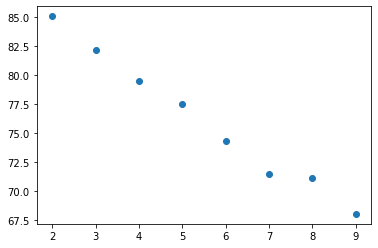

In [34]:
#plot looking for drop off to find ideal number of clusters
plt.scatter(range(2, 10), wss)

In [35]:
np.diff(wss)

array([-2.94113174, -2.60868186, -2.02805913, -3.19964766, -2.83134637,
       -0.31142793, -3.10840489])

In [36]:
wss

[85.090924175072,
 82.14979243293783,
 79.54111057641859,
 77.51305145111591,
 74.31340378743647,
 71.48205741304801,
 71.1706294836794,
 68.06222459337707]

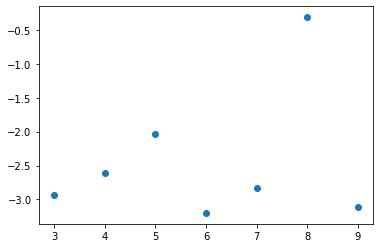

In [37]:
plt.scatter(range(3, 10), np.diff(wss))

In [38]:
model = KMeans(n_clusters=7, random_state=42, n_jobs=-1)

In [39]:
model.fit(features)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [40]:
cluster_labels = model.predict(features)

In [41]:
cluster_labels

array([0, 3, 1, 4, 2, 3, 2, 3, 6, 4, 3, 5, 1, 0, 3, 0, 1, 6, 3, 6, 0, 6,
       5, 0, 0, 6, 1, 6, 0, 0, 3, 0, 0, 1, 6, 1, 0, 0, 5, 3, 6, 5, 0, 4,
       0, 3, 0, 3, 5, 2, 0, 1, 0, 3, 5, 0, 2, 0, 0, 0, 0, 6, 0, 0, 0, 1,
       2, 4, 5, 6, 2, 5, 1, 0, 0, 0, 0, 6, 2, 3, 4, 0, 0, 0, 5, 0, 2, 6,
       2, 0, 5, 0, 0, 0, 6, 4, 1, 0, 6, 0])

In [42]:
# distribution of points in clusters
np.bincount(cluster_labels)

array([39, 10,  9, 12,  6, 10, 14], dtype=int64)

In [43]:
# top words in clusters
cluster0_tweets = np.array(clean_tweets)[cluster_labels == 0]
cluster0_tweets

array(['Jesse L Steinfeld Surgeon General Tobacco Foe die  ',
       'QampA Baby menopause', 'Map maker mind Control Flash Light',
       'teen sexting may less common fear  ',
       'Hunger Hormones May drive PostDieting Weight gain  ',
       'try sweet stirfry Thai flavor Photo Andrew Scrivani NYT  ',
       'US want Buttress Alzheimers Arsenal   ',
       'brewcitypaul thank respond NYTimes tweet football food Can dm us contact info',
       'Technophoria dissent device help find melanoma',
       'Burger King introduce LowerFat french fry',
       'e resolution lose weight year Jane Brodys triedandtrue weight loss tip',
       'Hookah Use   grow among Young Adults California  ',
       'fashionable option reshape sunprotective clothing',
       'opinion â\x80\x98Healthyâ\x80\x99 Microbiome',
       '  food reduce inflammation  ',
       'E Coli Chicken link Urinary Tract infection  ',
       'Will Eating Sweets make sweet  ',
       'BarryMeier FDA crack hydrocodone',
       'Sta

In [44]:
wordcount = nltk.FreqDist(nltk.tokenize.word_tokenize(' '.join(cluster0_tweets)))

In [45]:
# top 10 words from cluster
wordcount.most_common(10)

[('May', 3),
 ('US', 3),
 ('food', 3),
 ('grow', 3),
 ('Adults', 3),
 ('may', 2),
 ('sweet', 2),
 ('Photo', 2),
 ('Andrew', 2),
 ('Scrivani', 2)]

In [46]:
df.head()

,0,1,tweet
0,548662191340421120,Sat Dec 27 02:10:34 +0000 2014,Risks in Using Social Media to Spot Signs of M...
1,548579831169163265,Fri Dec 26 20:43:18 +0000 2014,RT @paula_span: The most effective nationwide ...
2,548579045269852161,Fri Dec 26 20:40:11 +0000 2014,The New Old Age Blog: Diabetes Prevention That...
3,548444679529041920,Fri Dec 26 11:46:15 +0000 2014,Well: Comfort Casseroles for Winter Dinners ht...
4,548311901227474944,Fri Dec 26 02:58:39 +0000 2014,High-Level Knowledge Before Veterans Affairs S...


In [47]:
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

In [48]:
"""https://spacy.io/api/annotation"""

def bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out


def words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))


In [53]:
tweet_words = list(words(clean_tweets))
#text check
print(tweet_words[:1])

# Build the bigram and trigram models
bigram = gensim.models.Phrases(tweet_words, min_count=5, threshold=80)
trigram = gensim.models.Phrases(bigram[tweet_words], threshold=80) 

bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)
#text check
print(trigram_mod[bigram_mod[tweet_words[0]]])

[['jesse', 'steinfeld', 'surgeon', 'general', 'tobacco', 'foe', 'die']]
['jesse', 'steinfeld', 'surgeon', 'general', 'tobacco', 'foe', 'die']


In [56]:
# Bigrams
tweet_bigrams = bigrams(tweet_words)
tweet_bigrams
# lemmatization
tweet_lemmatized = lemmatization(tweet_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
print(tweet_lemmatized[:1])

[['general', 'tobacco', 'foe', 'die']]


In [59]:
# Dictionary
id2word = corpora.Dictionary(tweet_lemmatized)
# Corpus
texts = tweet_lemmatized
# Tweet term frequency
corpus = [id2word.doc2bow(text) for text in texts]

In [61]:
# LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=5, 
                                           random_state=10,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [62]:
from pprint import pprint
# Topics key words
pprint(lda_model.print_topics())
lda = lda_model[corpus]

[(0,
  '0.015*"can" + 0.015*"plan" + 0.015*"grow" + 0.015*"health" + 0.015*"age" + '
  '0.015*"exercise" + 0.008*"significantly" + 0.008*"food" + 0.008*"middle" + '
  '0.008*"good"'),
 (1,
  '0.022*"food" + 0.015*"can" + 0.015*"take" + 0.015*"adopt" + 0.008*"photo" + '
  '0.008*"dm" + 0.008*"healthy" + 0.008*"news" + 0.008*"respond" + '
  '0.008*"lentil"'),
 (2,
  '0.022*"find" + 0.017*"brain" + 0.017*"age" + 0.012*"sweet" + 0.012*"care" + '
  '0.012*"study" + 0.012*"may" + 0.012*"fear" + 0.012*"help" + 0.012*"tract"'),
 (3,
  '0.019*"weight" + 0.019*"year" + 0.019*"statin" + 0.019*"ask" + '
  '0.013*"people" + 0.013*"may" + 0.013*"new" + 0.013*"can" + '
  '0.013*"guideline" + 0.007*"old"'),
 (4,
  '0.037*"study" + 0.025*"cancer" + 0.019*"adult" + 0.013*"drug" + '
  '0.013*"young" + 0.013*"new" + 0.013*"therapy" + 0.013*"risk" + '
  '0.013*"doctor" + 0.007*"exercise"')]


In [64]:
# Perplexity measures the model with lower scores being the goal and a sign of a good model
print('Perplexity: ', lda_model.log_perplexity(corpus))

Perplexity:  -6.540665078655643


In [66]:
# Coherence measures the proposed topics distinguishability
coherence_lda = CoherenceModel(model=lda_model, texts=tweet_lemmatized, dictionary=id2word, coherence='c_v')
coherence = coherence_lda.get_coherence()
print('Coherence: ', coherence)

Coherence:  0.5840670653286022


In [67]:
import pyLDAvis
import pyLDAvis.gensim 

# Topic Visualization
pyLDAvis.enable_notebook()
distance_map = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
distance_map

C:\Users\607791\Anaconda\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.105226  0.008110       1        1  25.283560
4      0.066872 -0.033504       2        1  21.149523
3     -0.073508 -0.114231       3        1  20.929596
1     -0.067181  0.073364       4        1  16.854233
0     -0.031409  0.066262       5        1  15.783092, topic_info=    Category      Freq           Term     Total  loglift  logprob
22   Default  6.000000          study  6.000000  30.0000  30.0000
60   Default  3.000000            age  3.000000  29.0000  29.0000
31   Default  3.000000           food  3.000000  28.0000  28.0000
179  Default  2.000000         statin  2.000000  27.0000  27.0000
156  Default  2.000000            ask  2.000000  26.0000  26.0000
14   Default  3.000000            can  3.000000  25.0000  25.0000
126  Default  3.000000           find  3.000000  24.0000  24.0000
16   Default  4.000000         cancer  4.000000  23.0000  23.0000
100  Default  2.000000         weight  2.000000  22.0000  22.0000
135  Default  2.000000           year  2.000000  21.0000  21.0000
143  Default  2.000000          adult  2.000000  20.0000  20.0000
158  Default  1.000000           plan  1.000000  19.0000  19.0000
113  Default  2.000000          brain  2.000000  18.0000  18.0000
144  Default  2.000000           grow  2.000000  17.0000  17.0000
157  Default  2.000000       exercise  2.000000  16.0000  16.0000
286  Default  1.000000          adopt  1.000000  15.0000  15.0000
7    Default  2.000000         health  2.000000  14.0000  14.0000
47   Default  2.000000           take  2.000000  13.0000  13.0000
75   Default  2.000000          young  2.000000  12.0000  12.0000
294  Default  1.000000           risk  1.000000  11.0000  11.0000
92   Default  2.000000      guideline  2.000000  10.0000  10.0000
169  Default  2.000000        therapy  2.000000   9.0000   9.0000
38   Default  2.000000         doctor  2.000000   8.0000   8.0000
104  Default  2.000000           help  2.000000   7.0000   7.0000
88   Default  3.000000            may  3.000000   6.0000   6.0000
51   Default  3.000000            new  3.000000   5.0000   5.0000
32   Default  1.000000           good  1.000000   4.0000   4.0000
11   Default  2.000000         people  2.000000   3.0000   3.0000
152  Default  1.000000          tract  1.000000   2.0000   2.0000
8    Default  1.000000           less  1.000000   1.0000   1.0000
..       ...       ...            ...       ...      ...      ...
28    Topic5  0.626142        allergy  1.096232   1.2862  -4.7789
214   Topic5  0.626142         report  1.096232   1.2862  -4.7789
212   Topic5  0.626140        illness  1.096232   1.2862  -4.7789
215   Topic5  0.626140  smokingrelate  1.096232   1.2862  -4.7789
163   Topic5  0.626139         option  1.096232   1.2862  -4.7789
220   Topic5  0.626139           cope  1.096233   1.2862  -4.7789
162   Topic5  0.626139    fashionable  1.096232   1.2862  -4.7789
165   Topic5  0.626138  sunprotective  1.096232   1.2862  -4.7789
221   Topic5  0.626138         hivaid  1.096232   1.2862  -4.7789
65    Topic5  0.626138          light  1.096233   1.2862  -4.7789
176   Topic5  0.626136       economic  1.096232   1.2862  -4.7789
172   Topic5  0.626136           back  1.096233   1.2862  -4.7789
164   Topic5  0.626136        reshape  1.096233   1.2862  -4.7789
2     Topic5  0.626135        general  1.096233   1.2862  -4.7789
296   Topic5  0.626134            sex  1.096233   1.2862  -4.7789
222   Topic5  0.626134            pet  1.096233   1.2862  -4.7789
1     Topic5  0.626134            foe  1.096233   1.2862  -4.7789
295   Topic5  0.626134            hip  1.096233   1.2862  -4.7789
144   Topic5  1.147921           grow  2.209266   1.1915  -4.1728
157   Topic5  1.145846       exercise  2.209540   1.1896  -4.1746
7     Topic5  1.145985         health  2.250464   1.1714  -4.1745
60    Topic5  1.145937            age  3.514541   0.7255  -4.1745
14    Topic5  1

The goal of this assignment was to cluster tweets into topics using TFIDF/Kmeans and LDA. Both methods were successfully able to cluster the tweets. Personally, I think TFIDF is more suited for longer documents that contain more text than tweets which is why I went with LDA for the second model. I feel LDA shines on smaller text but is outclassed on larger documents making tweets an ideal use case. LDA ultimately had an intermediate perplexity and coherence score. (Perplexity measures the model with lower scores being the goal and a sign of a good model and coherence measures the proposed topics distinguishability. The top terms for each topic were also determined, the "pylDavis" visualization package is fantastic in this regard as it shows not only the topics distance but also the top words and the words that overlap between topics. It is a useful tool in selecting the ideal number of topics as the more topics that are added often the more overlap occurs which tends to be undesirable.